In [114]:
#pip install auto-sklearn

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

# **Ant Nuptial Flight Predictor**
---



In [116]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --disable-pip-version-check --root-user-action=ignore python-arango sklite m2cgen pipelineprofiler xgboost

In [117]:
from math import log10, floor
def round_sig(x, sig=2):
    if x == 0: return x
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [118]:
from arango import ArangoClient
from datetime import datetime

# Initialize the ArangoDB client.
client = ArangoClient(hosts='http://arangodb:8529')

# Connect to "_system" database as root user.
# This returns an API wrapper for "_system" database.
# sys_db = client.db('_system', username='root', password='passwd')

# Connect to "nuptialFlight" database as root user.
# This returns an API wrapper for "nuptialFlight" database.
db = client.db('nuptialFlight', username='notebook', password='g54g54gwggsvd')

# Execute an AQL query. This returns a result cursor.
#FILTER DISTANCE(f.weather.lat, f.weather.lon, -35, 149) < 5000 * 1000
cursor = db.aql.execute(
    '''
FOR f IN flights
FILTER f.weather.hourly != null
RETURN {
    f
}
    ''')

# Normalise all values to between 0 and 1
def normalise(low, high, value):
    return (max(low, min(high, value)) - low) / (high - low)


count = 0
#dataset = []
features = []
for row in cursor:
    if count == 0: print(row)
    count = count + 1
    #dataset.append(row['f'])
    features.append({
        #'_id': row['f']['_id'],
        'target': row['f']['flight'] == 'yes',
        #'target': row['f'].get('size', 'none'),
        'lat': round(row['f']['weather']['lat'], 0),
        'lon': round(row['f']['weather']['lon'], 0),
        'dayOfYear': datetime.utcfromtimestamp(row['f']['weather']['hourly'][0]['dt']).timetuple().tm_yday, # returns 1 for January 1st,
        'hour':      datetime.utcfromtimestamp(row['f']['weather']['hourly'][0]['dt']).timetuple().tm_hour + 1,
        #'month': datetime.utcfromtimestamp(row['f']['weather']['hourly'][0]['dt']).timetuple().tm_mon,
        #'season': datetime.utcfromtimestamp(row['f']['weather']['hourly'][0]['dt']).timetuple().tm_mon % 12 // 3 + 1,
        #'day': row['f']['weather']['hourly'][0]['temp']['day'],
        #'eve': row['f']['weather']['hourly'][0]['temp']['eve'],
        #'min': row['f']['weather']['hourly'][0]['temp']['min'],
        #'max': row['f']['weather']['hourly'][0]['temp']['max'],
        #'night': row['f']['weather']['hourly'][0]['temp']['night'],
        #'morn': row['f']['weather']['hourly'][0]['temp']['morn'],
        'temp': row['f']['weather']['hourly'][0]['temp'],
        #'feelsLike': row['f']['weather']['hourly'][0]['feels_like']['day'],
        'windSpeed': row['f']['weather']['hourly'][0]['wind_speed'],
        #'windGust': row['f']['weather']['hourly'][0]['wind_gust'],
        'windDeg': row['f']['weather']['hourly'][0]['wind_deg'],
        'rain': row['f']['weather']['hourly'][0]['pop'],
        'humid': row['f']['weather']['hourly'][0]['humidity'],
        'cloud': row['f']['weather']['hourly'][0]['clouds'],
        'press': row['f']['weather']['hourly'][0]['pressure'],
        'dewPoint': row['f']['weather']['hourly'][0]['dew_point'],
        #'description': row['f']['weather']['hourly'][0]['weather'][0]['description'],
        #'uvi': row['f']['weather']['hourly'][0]['uvi'],
        
        #'day': normalise(10, 30, row['f']['weather']['hourly'][0]['temp']['day']),
        #'eve': normalise(10, 30, row['f']['weather']['hourly'][0]['temp']['eve']),
        #'min': normalise(5, 25, row['f']['weather']['hourly'][0]['temp']['min']),
        #'max': normalise(15, 35, row['f']['weather']['hourly'][0]['temp']['max']),
        #'night': normalise(5, 25, row['f']['weather']['hourly'][0]['temp']['night']),
        #'morn': normalise(5, 25, row['f']['weather']['hourly'][0]['temp']['morn']),
        #'feelsLike': normalise(10, 40, row['f']['weather']['hourly'][0]['feels_like']['day']),
        #'windSpeed': normalise(0, 15, row['f']['weather']['hourly'][0]['wind_speed']),
        #'windGust': normalise(0, 15, row['f']['weather']['hourly'][0]['wind_gust']),
        #'rain': normalise(0, 1, row['f']['weather']['hourly'][0]['pop']),
        #'humid': normalise(0, 100, row['f']['weather']['hourly'][0]['humidity']),
        #'cloud': normalise(0, 100, row['f']['weather']['hourly'][0]['clouds']),
        #'press': normalise(995, 1030, row['f']['weather']['hourly'][0]['pressure']),
        #'dewPoint': normalise(-5, 25, row['f']['weather']['hourly'][0]['dew_point']),
        #'description': row['f']['weather']['daily'][0]['weather'][0]['description'],
        #'uvi': normalise(0, 14, row['f']['weather']['hourly'][0]['uvi']),
    })

print(len(features))
print(features[0])
#print(dataset[0])

{'f': {'_key': '11249779', '_id': 'flights/11249779', '_rev': '_fWEAdhO---', 'flight': 'unknown', 'version': '2.2.2+62', 'device_id': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36', 'weather': {'lat': -35.7534, 'lon': 150.1995, 'timezone': 'Australia/Sydney', 'timezone_offset': 39600, 'hourly': [{'dt': 1672912800, 'temp': 17.28, 'feels_like': 17.05, 'pressure': 1014, 'humidity': 76, 'dew_point': 13.01, 'uvi': 0, 'clouds': 100, 'visibility': 10000, 'wind_speed': 6.67, 'wind_deg': 194, 'wind_gust': 10.41, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'pop': 0.26}, {'dt': 1672916400, 'temp': 17.6, 'feels_like': 17.43, 'pressure': 1014, 'humidity': 77, 'dew_point': 13.52, 'uvi': 0, 'clouds': 100, 'visibility': 10000, 'wind_speed': 5.69, 'wind_deg': 202, 'wind_gust': 9.53, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'pop': 0.34, 'rain': 

In [119]:
from sklearn import preprocessing

df = pd.DataFrame(data=features)

df['northern'] = [lat > 0 for lat in df['lat']]
df['daysSinceSpring'] = [((dayOfYear - (31 + 28 + 31 + 30 + 31 + 30 + 31 + 31)) % 365) for dayOfYear in df['dayOfYear']]
df.loc[df['northern'] == True, 'daysSinceSpring'] = (df['daysSinceSpring'] - (31 + 30 + 31 + 30 + 31 + 31)) % 365

df = df.drop(['dayOfYear', 'northern'], axis=1)

# split into input and output elements
#data = df.values
#X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)
print(df['target'].value_counts())

df

False    39854
True      1995
Name: target, dtype: int64


,target,lat,lon,hour,temp,windSpeed,windDeg,rain,humid,cloud,press,dewPoint,daysSinceSpring
0,False,-36.0,150.0,11,17.28,6.67,194,0.26,76,100,1014,13.01,127
1,False,39.0,-77.0,11,11.75,1.83,309,0.00,83,71,1012,8.96,308
2,False,39.0,-77.0,11,11.75,1.83,309,0.00,83,71,1012,8.96,308
3,False,37.0,-122.0,11,13.28,6.43,196,1.00,85,97,1005,10.81,308
4,False,39.0,-77.0,11,11.75,1.83,309,0.00,83,71,1012,8.96,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41844,False,10.0,124.0,14,27.73,1.89,234,0.73,80,96,1010,23.96,163
41845,False,42.0,-84.0,14,19.92,1.80,254,0.00,85,0,1015,17.32,163
41846,False,40.0,-3.0,14,35.33,4.79,210,0.00,23,0,1020,11.06,163
41847,False,39.0,-9.0,14,24.29,6.65,332,0.00,55,0,1017,14.68,163


In [120]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

TEMP_AVG = 16.5; # 24.00;
TEMP_STD = 10; # 3.96;
HUMIDITY_AVG = 77.00; # 62.00;
HUMIDITY_STD = 30; # 7.99;
WIND_AVG = 5.7; # 3.96;
WIND_STD = 5; # 0.78;
RAIN_AVG = 0;
RAIN_STD = 0;
CLOUD_AVG = 70;
CLOUD_STD = 30;
PRESSURE_AVG = 1014; # 1020;
PRESSURE_STD = 14.85;
RADIATION_AVG = 225.7; # (J.cm-2.h-1)
RADIATION_STD = 19.5; # SE not SD
UVI_AVG = 6.1;
UVI_STD = 6;

def true_temp(temp):
    return max(0, min(0.5, norm.cdf(-abs(temp - TEMP_AVG) / TEMP_STD))) * 2

def true_humidity(humidity):
    return max(0, min(0.5, norm.cdf(-abs(humidity - HUMIDITY_AVG) / HUMIDITY_STD))) * 2

def true_wind(windSpeed):
    return max(0, min(0.5, norm.cdf(-abs(windSpeed - WIND_AVG) / WIND_STD))) * 2

def true_rain(pop):
    return 1.0 - pop

def true_cloud(cloud):
    return max(0, min(0.5, norm.cdf(-abs(cloud - CLOUD_AVG) / CLOUD_STD))) * 2

def true_pressure(pressure):
    return max(0, min(0.5, norm.cdf(-abs(pressure - PRESSURE_AVG) / PRESSURE_STD))) * 2

def true_uvi(uvi):
    return max(0, min(0.5, norm.cdf(-abs(uvi - UVI_AVG) / UVI_STD))) * 2

def true_dewPoint(dewPoint):
    return max(0, min(0.5, norm.cdf(-abs(dewPoint - TEMP_AVG) / TEMP_STD))) * 2

def true_funct(val):
    return 1

def map_true_fun(X, function):
    return list(map(function, X))

In [121]:
#df = df.assign(deltaDay = lambda x: true_temp(x.day))
#df = df.assign(deltaWind = lambda x: true_wind(x.windSpeed))
#df = df.assign(deltaHumid = lambda x: true_humidity(x.humid))
#df = df.assign(deltaCloud = lambda x: true_cloud(x.cloud))
#df = df.assign(deltaPress = lambda x: true_pressure(x.press))

for i in range(len(df)):
    #df.loc[i, "day"]   = round_sig((df.iloc[i]["day"]), 2)
    #df.loc[i, "morn"] = round_sig((df.iloc[i]["morn"]), 2)
    df.loc[i, "temp"]  = round_sig((df.iloc[i]["temp"]), 2)
    df.loc[i, "windSpeed"]  = round_sig((df.iloc[i]["windSpeed"]), 2)
    #df.loc[i, "windGust"] = round_sig((df.iloc[i]["windGust"]), 2)
    df.loc[i, "windDeg"]  = round_sig((df.iloc[i]["windDeg"]), 2)
    df.loc[i, "rain"] = round_sig((df.iloc[i]["rain"]), 2)
    df.loc[i, "humid"] = round_sig((df.iloc[i]["humid"]), 2)
    df.loc[i, "cloud"] = round_sig((df.iloc[i]["cloud"]), 2)
    df.loc[i, "press"] = round_sig((df.iloc[i]["press"]), 4)
    df.loc[i, "dewPoint"] = round_sig((df.iloc[i]["dewPoint"]), 2)

print(df['target'].value_counts())
df

False    39854
True      1995
Name: target, dtype: int64


,target,lat,lon,hour,temp,windSpeed,windDeg,rain,humid,cloud,press,dewPoint,daysSinceSpring
0,False,-36.0,150.0,11,17.0,6.7,190,0.26,76,100,1014,13.0,127
1,False,39.0,-77.0,11,12.0,1.8,310,0.00,83,71,1012,9.0,308
2,False,39.0,-77.0,11,12.0,1.8,310,0.00,83,71,1012,9.0,308
3,False,37.0,-122.0,11,13.0,6.4,200,1.00,85,97,1005,11.0,308
4,False,39.0,-77.0,11,12.0,1.8,310,0.00,83,71,1012,9.0,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41844,False,10.0,124.0,14,28.0,1.9,230,0.73,80,96,1010,24.0,163
41845,False,42.0,-84.0,14,20.0,1.8,250,0.00,85,0,1015,17.0,163
41846,False,40.0,-3.0,14,35.0,4.8,210,0.00,23,0,1020,11.0,163
41847,False,39.0,-9.0,14,24.0,6.6,330,0.00,55,0,1017,15.0,163


In [122]:
# force the column's string column B to type 'category'  
df['target'] = df['target'].astype('category')
# define the valid categories: 
df['target'] = df['target'].cat.set_categories([True, False], ordered=True) 
#pandas dataframe sort_values to inflicts order on your categories 
df.sort_values(['target'], inplace=True, ascending=True) 


In [123]:
#check null values in the dataset
df.isnull().sum()

target             0
lat                0
lon                0
hour               0
temp               0
windSpeed          0
windDeg            0
rain               0
humid              0
cloud              0
press              0
dewPoint           0
daysSinceSpring    0
dtype: int64

In [124]:
from sklearn.utils import resample
healthy   = df[df["target"] != False]
unhealthy = df[df["target"] == False]

In [125]:
healthy

,target,lat,lon,hour,temp,windSpeed,windDeg,rain,humid,cloud,press,dewPoint,daysSinceSpring
10685,True,39.0,-96.0,21,27.0,9.30,170,0.00,32,0,1006,9.3,41
36696,True,52.0,15.0,9,20.0,4.80,290,0.31,67,68,1011,14.0,139
26029,True,43.0,28.0,14,24.0,5.10,120,0.00,62,100,1013,17.0,104
16479,True,40.0,-86.0,21,24.0,3.80,120,0.00,33,10,1019,7.1,68
16477,True,35.0,-97.0,21,28.0,4.20,130,0.75,59,75,1012,19.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41072,True,50.0,-4.0,18,21.0,3.20,170,0.00,81,79,1019,18.0,159
40765,True,55.0,-2.0,18,19.0,5.20,280,0.00,52,20,1010,8.6,158
20096,True,42.0,23.0,7,20.0,0.56,340,0.00,65,99,1016,13.0,83
20456,True,43.0,-92.0,17,20.0,3.60,140,0.00,45,8,1027,7.4,84


In [126]:
unhealthy

,target,lat,lon,hour,temp,windSpeed,windDeg,rain,humid,cloud,press,dewPoint,daysSinceSpring
28381,False,48.0,-123.0,22,18.0,3.4,310,0.03,78,40,1016,14.0,111
21907,False,41.0,28.0,17,20.0,4.6,56,0.00,53,0,1014,10.0,90
21927,False,42.0,-71.0,19,29.0,2.3,140,0.00,41,0,1016,15.0,90
28488,False,41.0,29.0,9,28.0,4.0,68,0.00,54,0,1018,18.0,112
28485,False,55.0,24.0,8,19.0,2.0,260,0.00,70,20,1015,14.0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14235,False,48.0,16.0,13,19.0,7.4,140,0.00,51,49,1015,8.2,59
14236,False,40.0,29.0,13,20.0,3.6,20,0.00,39,23,1018,5.8,59
14238,False,42.0,-88.0,14,4.9,7.3,300,0.32,82,100,995,2.1,59
14230,False,51.0,-2.0,13,16.0,5.4,310,0.37,74,82,1018,11.0,59


In a Machine Learning problem, make sure to upsample/downsample ONLY AFTER you split into train, test (and validate if you wish). If you do upsample your dataset before you split into train and test, there is a high possibility that your model is exposed to data leakage. See an Example below.
https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4

In [127]:
up_sampled = resample(unhealthy, replace=False, n_samples=int(len(healthy)))
up_sampled = pd.concat([healthy, up_sampled])

In [128]:
#check updated class counts
up_sampled['target'].value_counts()

True     1995
False    1995
Name: target, dtype: int64

In [129]:
#X1 = up_sampled.drop(['target','day','windSpeed','humid','cloud','press',], axis=1)
X1 = up_sampled.drop(['target'], axis=1)
y1 = up_sampled['target']
X1.shape, y1.shape

((3990, 12), (3990,))

In [130]:
corr_matrix = X1.corr()
#print(corr_matrix['day'].sort_values(ascending=False))
#print(corr_matrix['morn'].sort_values(ascending=False))
print()
print(corr_matrix['windSpeed'].sort_values(ascending=False))
#print(corr_matrix['windGust'].sort_values(ascending=False))
print()
print(corr_matrix['humid'].sort_values(ascending=False))
print()
#print(corr_matrix['cloud'].sort_values(ascending=False))
#print()
print(corr_matrix['press'].sort_values(ascending=False))
print()
print(corr_matrix['dewPoint'].sort_values(ascending=False))
corr_matrix


windSpeed          1.000000
windDeg            0.088402
cloud              0.026773
lat                0.019098
rain               0.017641
hour               0.012072
lon                0.009507
temp              -0.008789
daysSinceSpring   -0.016970
dewPoint          -0.083549
humid             -0.104459
press             -0.140731
Name: windSpeed, dtype: float64

humid              1.000000
rain               0.449272
dewPoint           0.423531
cloud              0.419227
lon                0.137770
daysSinceSpring    0.064699
press             -0.048855
hour              -0.053640
lat               -0.054076
windDeg           -0.071186
windSpeed         -0.104459
temp              -0.380621
Name: humid, dtype: float64

press              1.000000
daysSinceSpring    0.108436
hour               0.049229
lat                0.025029
humid             -0.048855
lon               -0.082472
windDeg           -0.129787
windSpeed         -0.140731
cloud             -0.151103
rain         

,lat,lon,hour,temp,windSpeed,windDeg,rain,humid,cloud,press,dewPoint,daysSinceSpring
lat,1.000000,-0.623791,0.251165,-0.162828,0.019098,0.065478,0.026188,-0.054076,0.043381,0.025029,-0.193181,-0.465487
lon,-0.623791,1.000000,-0.233085,0.168892,0.009507,-0.076694,0.049221,0.137770,0.063697,-0.082472,0.281682,0.323385
hour,0.251165,-0.233085,1.000000,-0.025733,0.012072,0.010121,0.004547,-0.053640,0.034424,0.049229,-0.064215,-0.113956
temp,-0.162828,0.168892,-0.025733,1.000000,-0.008789,-0.002521,-0.037064,-0.380621,-0.187406,-0.285095,0.652640,0.019582
windSpeed,0.019098,0.009507,0.012072,-0.008789,1.000000,0.088402,0.017641,-0.104459,0.026773,-0.140731,-0.083549,-0.016970
windDeg,0.065478,-0.076694,0.010121,-0.002521,0.088402,1.000000,0.011934,-0.071186,-0.011090,-0.129787,-0.068293,-0.017330
rain,0.026188,0.049221,0.004547,-0.037064,0.017641,0.011934,1.000000,0.449272,0.403033,-0.266219,0.297979,-0.055172
humid,-0.054076,0.137770,-0.053640,-0.380621,-0.104459,-0.071186,0.449272,1.000000,0.419227,-0.048855,0.423531,0.064699
cloud,0.043381,0.063697,0.034424,-0.187406,0.026773,-0.011090,0.403033,0.419227,1.000000,-0.151103,0.139942,-0.021031
press,0.025029,-0.082472,0.049229,-0.285095,-0.140731,-0.129787,-0.266219,-0.048855,-0.151103,1.000000,-0.290050,0.108436


In [131]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.5)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((1995, 12), (1995, 12), (1995,), (1995,))

In [132]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV

# define the model
#automl = ExtraTreesClassifier(n_jobs=-1, n_estimators=8, min_samples_split=24, ccp_alpha=0.000005,)
automl = ExtraTreesClassifier(n_jobs=-1, n_estimators=18)
    #min_samples_split=3, n_estimators=32, n_jobs=-1, ccp_alpha=0.0008)

# fit the model on the whole dataset
automl.fit(X1_train, y1_train)

# calibrate
calibrated = CalibratedClassifierCV(base_estimator=automl, n_jobs=-1, ensemble=True)
calibrated.fit(X1_train, y1_train)

CalibratedClassifierCV(base_estimator=ExtraTreesClassifier(n_estimators=18,
                                                           n_jobs=-1),
                       n_jobs=-1)

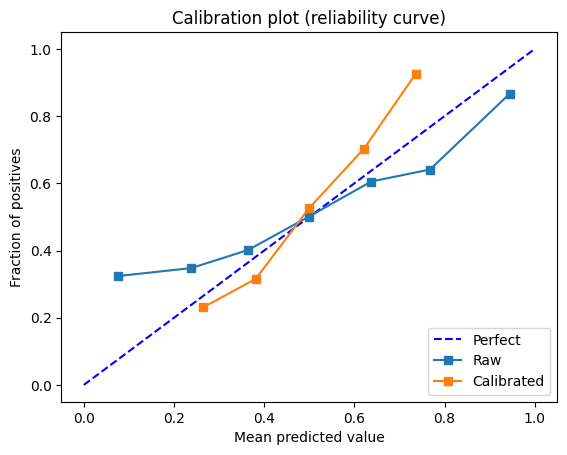

In [133]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfect")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

prob_pos_rfc = automl.predict_proba(X1_test)[:, 1]
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y1_test, prob_pos_rfc, n_bins=7)
ax.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-", label="%s" % ('Raw'))

prob_pos_lr = calibrated.predict_proba(X1_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y1_test, prob_pos_lr, n_bins=7)
ax.plot(mean_predicted_value_lr, fraction_of_positives_lr, "s-", label="%s" % ('Calibrated'))

ax.legend(loc="lower right")
plt.show()

In [134]:
#automl.refit(X1_train.copy(), y1_train.copy())

In [135]:
#print(automl.sprint_statistics())

In [136]:
#automl.leaderboard()

In [137]:
#automl.leaderboard(detailed = True, ensemble_only=False)

In [138]:
#automl.show_models()

In [139]:
#automl.get_models_with_weights()

In [140]:
automl.score(X1_train, y1_train)

0.9974937343358395

In [141]:
automl.score(X1_test, y1_test)

0.5994987468671679

True Positive(TP)  =  544
False Positive(FP) =  469
True Negative(TN)  =  652
False Negative(FN) =  330


<AxesSubplot: >

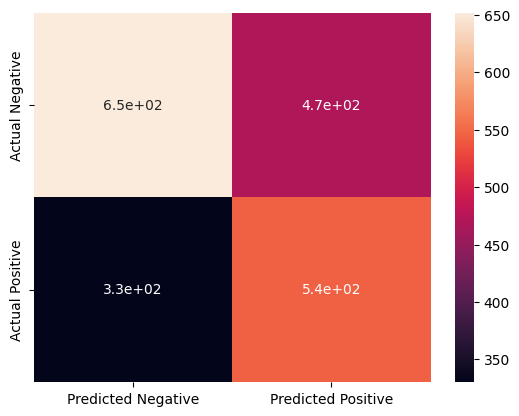

In [142]:
# Score of the final ensemble
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred = automl.predict(X1_test)
conf_matrix = confusion_matrix(y1_pred, y1_test)

TN, FP, FN, TP = conf_matrix.ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

sns.heatmap(conf_matrix, annot=True, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

pred = automl.predict(X1_test)
m2_acc_score = accuracy_score(y1_test, y1_pred)
print("Test Accuracy score  {0}".format(m2_acc_score))
m2_test_f1 = f1_score(y1_test, y1_pred)
print(f"Test F1-Score        {m2_test_f1}")

Test Accuracy score  0.5994987468671679
Test F1-Score        0.5765765765765766


In [144]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

       False       0.58      0.66      0.62       982
        True       0.62      0.54      0.58      1013

    accuracy                           0.60      1995
   macro avg       0.60      0.60      0.60      1995
weighted avg       0.60      0.60      0.60      1995



In [145]:
import pickle
# save the model 
filename = 'hour_model_01.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [146]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X1_test, y1_test)
print(result)

0.5994987468671679


In [147]:
import os
import joblib
# save the model 
joblib.dump(automl, filename)
print(f"Random Forest size: {np.round(os.path.getsize(filename) / 1024 / 1024, 2) } MB")

Random Forest size: 2.64 MB


In [150]:
# define one new data instance
#Xsample = {'day': 0.30, 'eve': 0.15, 'min': 0.16, 'max': 0.07, 'night': 0.18, 'morn': 0.27, 'feelsLike': 0.20, 'windSpeed': 0.38, 'windGust': 0.48, 'rain': 0.99, 'humid': 0.76, 'cloud': 0.99, 'press': 0.54, 'dewPoint': 0.57, 'uvi': 0.43}
#Xsample = {'lat': -35.1968, 'day': 16.37, 'eve': 13.05, 'min': 8.35, 'max': 16.37, 'night': 8.35, 'morn': 10.38, 'feelsLike': 16.07, 'windSpeed': 5.64, 'windGust': 7.2, 'rain': 1, 'humid': 77, 'cloud': 73, 'press': 1014, 'dewPoint': 11.95, 'uvi': 6.05}
#Xsample = {'lat': -35.0, 'day': 22, 'eve': 18, 'min': 13, 'max': 23, 'night': 16, 'morn': 17, 'feelsLike': 23, 'windSpeed': 4, 'windGust': 4, 'rain': 0, 'humid': 70, 'cloud': 0, 'press': 1010, 'dewPoint': 18.43, 'uvi': 6}
Xsample = {'lat': -35.2, 'lon': 149.1, 'hour': 11, 'dayOfYear': 281, 'month': 10, 'season': 4, 'northern': False, 'daysSinceSpring': 38, 'day': 16.4, 'eve': 13.1, 'min': 8.3, 'max': 16.4, 'night': 8.4, 'morn': 10.5, 'temp': 16.4, 'feelsLike': 16.1, 'windSpeed': 5.7, 'windGust': 7.1, 'windDeg': 194, 'rain': 0.65, 'humid': 77, 'cloud': 74, 'press': 1015, 'dewPoint': 12.0, 'uvi': 6.1}
#Xsample = {'lat': -28.0, 'lon': 153.0, 'northern': False, 'daysSinceSpring': 140, 'day': 27.0, 'windSpeed': 5.7, 'windGust': 7.1, 'rain': 0.95, 'humid': 77, 'cloud': 74, 'press': 1013, 'dewPoint': 12.0, 'uvi': 6.1}
#print(Xsample)

#Xsample["deltaDay"] = true_temp(Xsample["day"])
#Xsample["deltaWind"] = true_wind(Xsample["windSpeed"])
#Xsample["deltaHumid"] = true_humidity(Xsample["humid"])
#Xsample["deltaCloud"] = true_cloud(Xsample["cloud"])
#Xsample["deltaPress"] = true_pressure(Xsample["press"])


Xtest = [Xsample]
Xnew = pd.DataFrame(data=Xtest, columns=X1_train.columns)
#print(Xnew)

# make a prediction
print(automl.predict(Xnew)[0])

# make a prediction
print(automl.predict_proba(Xnew)[0][1])
print(calibrated.predict_proba(Xnew)[0][1])

# get decision path
#print(automl.decision_path(Xnew))

# show the inputs and predicted outputs
Xnew

False
0.3888888888888889
0.45828483519992924


,lat,lon,hour,temp,windSpeed,windDeg,rain,humid,cloud,press,dewPoint,daysSinceSpring
0,-35.2,149.1,11,16.4,5.7,194,0.65,77,74,1015,12.0,38


In [151]:
def chart_parameter(title, parameter, true_fun, pMin, pMax):   
    Xtest = []
    for i in np.linspace(pMin, pMax, 100):
        XsampleCopy = Xsample.copy()
        XsampleCopy[parameter] = i
        #XsampleCopy["deltaDay"] = true_temp(XsampleCopy["day"])
        #XsampleCopy["deltaWind"] = true_wind(XsampleCopy["windSpeed"])
        #XsampleCopy["deltaHumid"] = true_humidity(XsampleCopy["humid"])
        #XsampleCopy["deltaCloud"] = true_cloud(XsampleCopy["cloud"])
        #XsampleCopy["deltaPress"] = true_pressure(XsampleCopy["press"])
        Xtest.append(XsampleCopy)

    Xnew = pd.DataFrame(data=Xtest, columns=X1_train.columns)
    #print(Xnew)

    n_samples = 0
    degrees = [1]

    #X = np.sort(np.random.rand(n_samples))
    #y = true_fun(X) + np.random.randn(n_samples) * 0.1
    #y = map_true_fun(X, true_fun)

    plt.figure(figsize=(14, 4))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        #plt.setp(ax, xticks=())

        X_test = np.linspace(pMin, pMax, 100)
        #prediction = automl.predict_proba(Xnew)
        prediction = [item[1] for item in automl.predict_proba(Xnew)]
        plt.plot(X_test, prediction, label="Model")
        plt.plot(X_test, map_true_fun(X_test, true_fun), label="App")
        #plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("Parameter")
        plt.ylabel("Confidence")
        plt.xlim((pMin, pMax))
        plt.ylim((-0.05, 1.05))
        plt.legend(loc="best")
        plt.title(title)
    plt.show()
    prediction

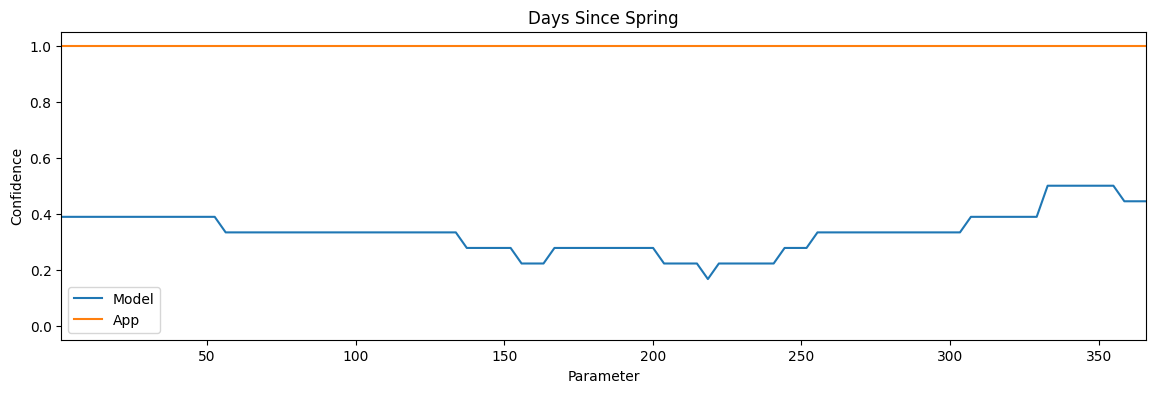

In [152]:
chart_parameter('Days Since Spring', 'daysSinceSpring', true_funct, 1, 366)

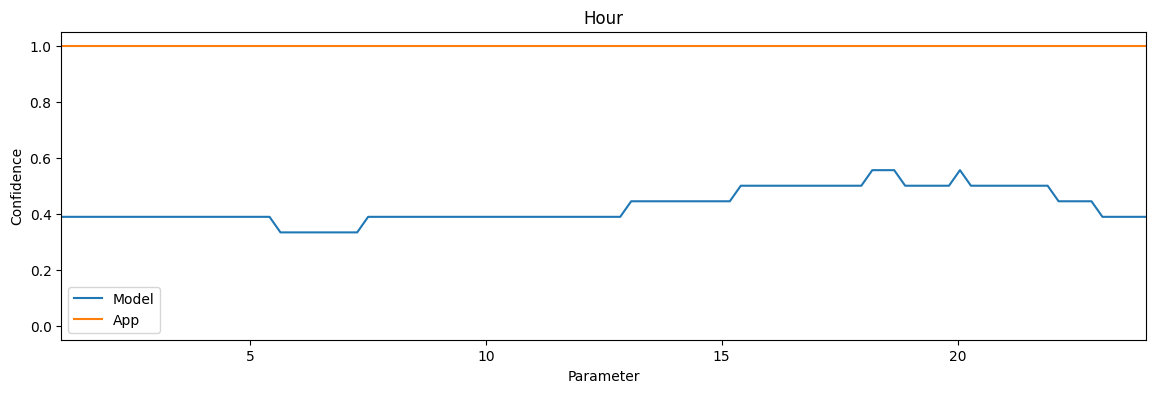

In [153]:
chart_parameter('Hour', 'hour', true_funct, 1, 24)

In [154]:
#chart_parameter('Morning Temp', 'morn', true_temp, 0, 40)

In [155]:
#chart_parameter('Day Temp', 'day', true_temp, 0, 40)

In [156]:
#chart_parameter('Eve Temp', 'eve', true_temp, 0, 40)

In [157]:
#chart_parameter('Min Temp', 'min', true_temp, 0, 40)

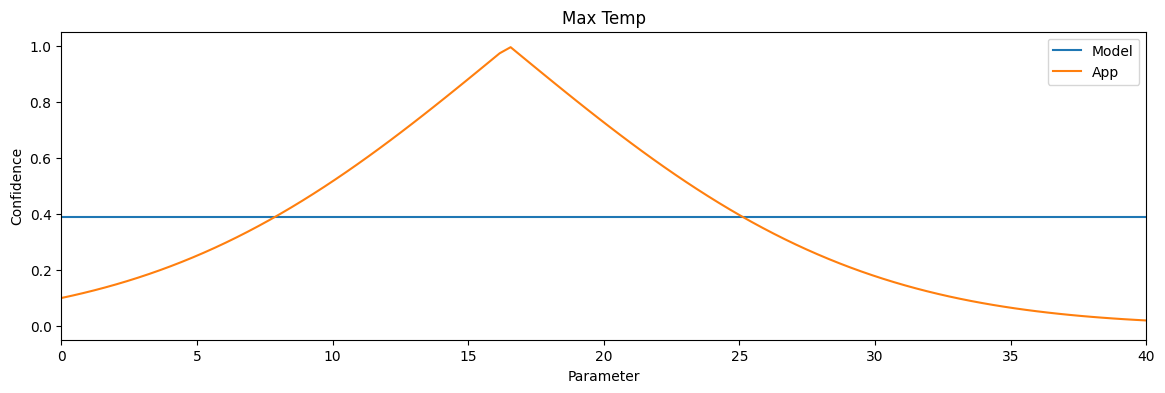

In [158]:
#chart_parameter('Max Temp', 'max', true_temp, 0, 40)

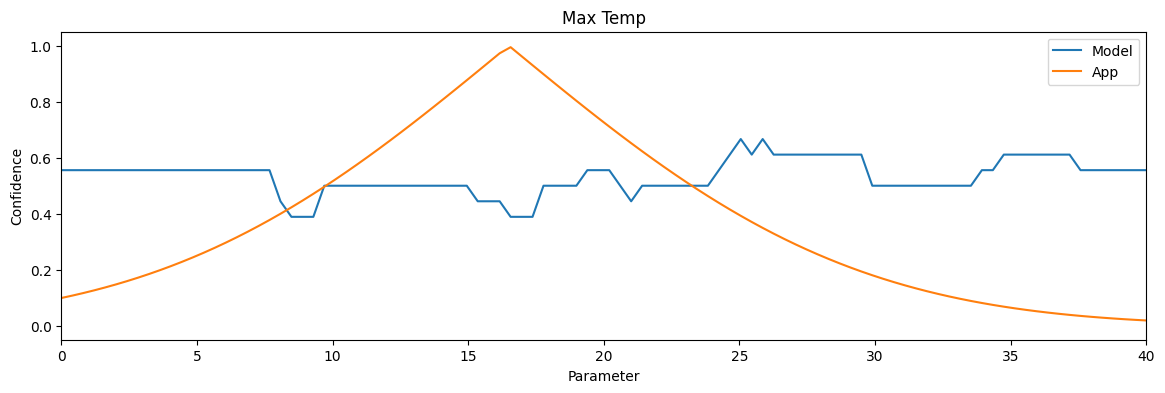

In [170]:
chart_parameter('Max Temp', 'temp', true_temp, 0, 40)

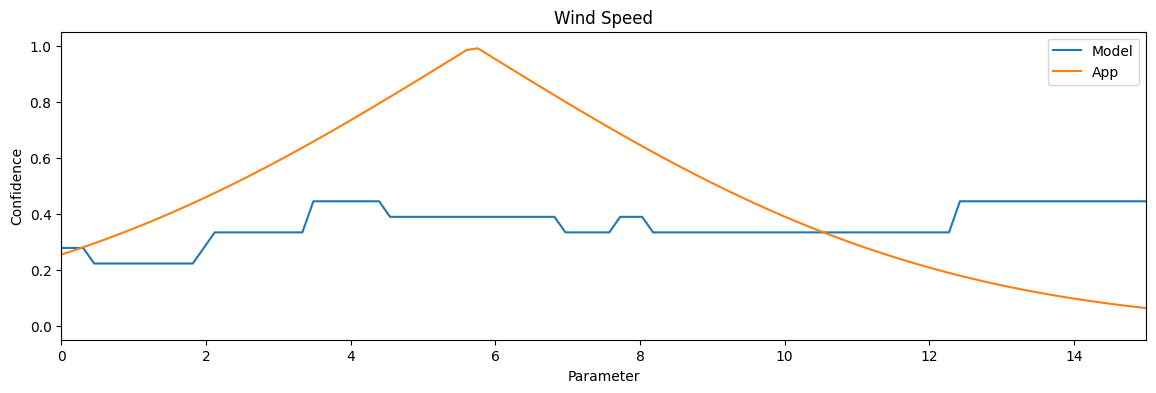

In [159]:
chart_parameter('Wind Speed', 'windSpeed', true_wind, 0, 15)

In [160]:
#chart_parameter('Wind Gust', 'windGust', true_wind, 0, 15)

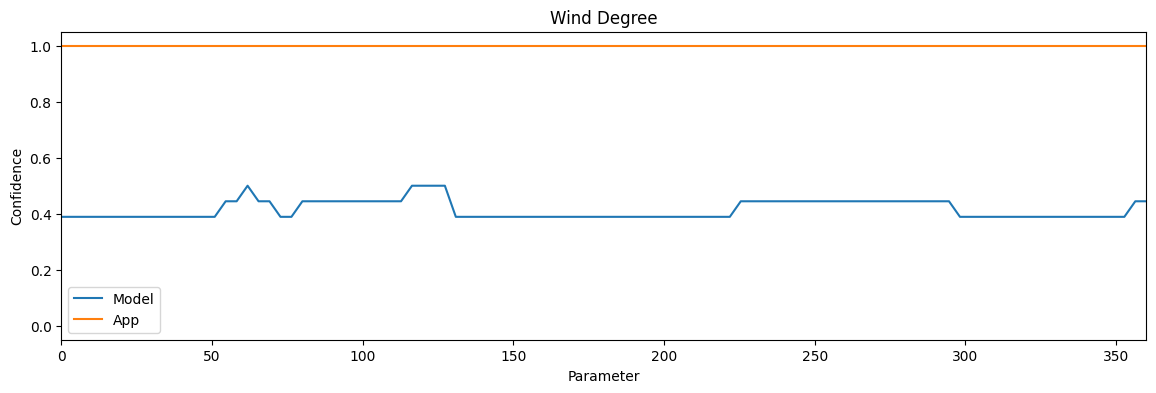

In [161]:
chart_parameter('Wind Degree', 'windDeg', true_funct, 0, 360)

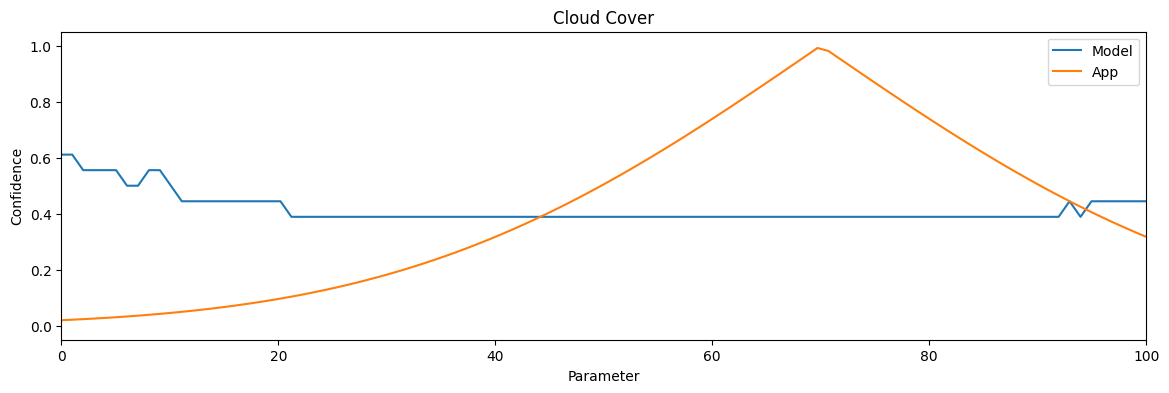

In [162]:
chart_parameter('Cloud Cover', 'cloud', true_cloud, 0, 100)

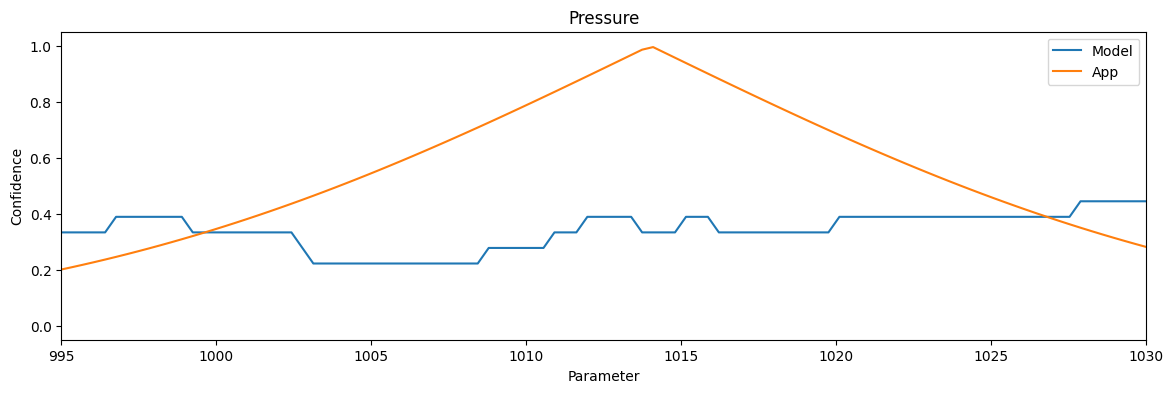

In [163]:
chart_parameter('Pressure', 'press', true_pressure, 995, 1030)

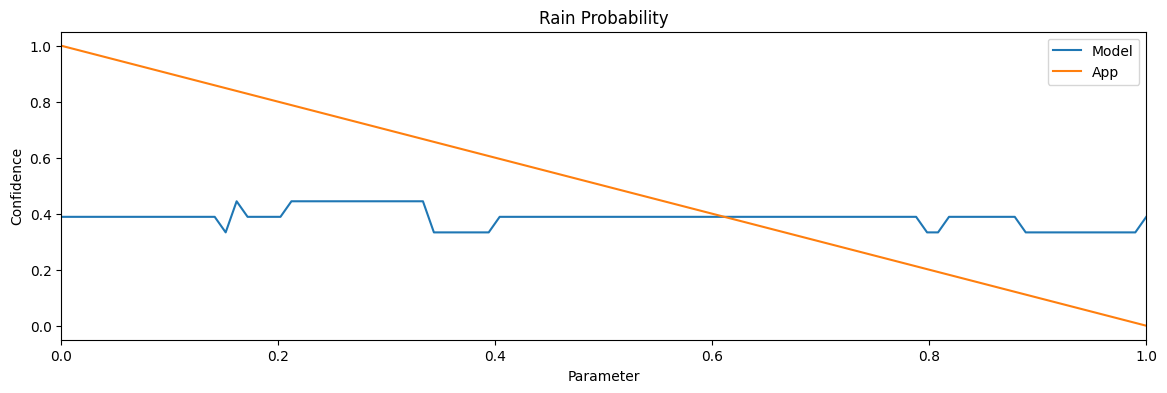

In [164]:
chart_parameter('Rain Probability', 'rain', true_rain, 0, 1)

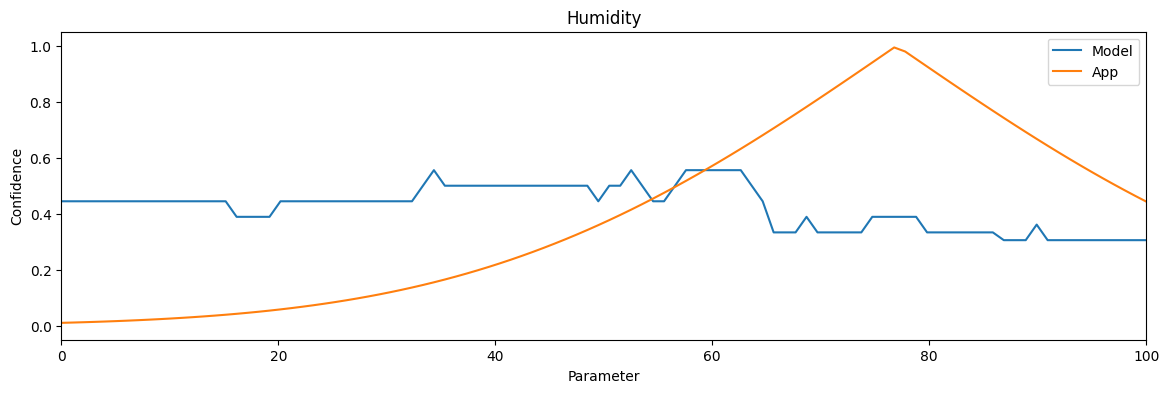

In [165]:
chart_parameter('Humidity', 'humid', true_humidity, 0, 100)

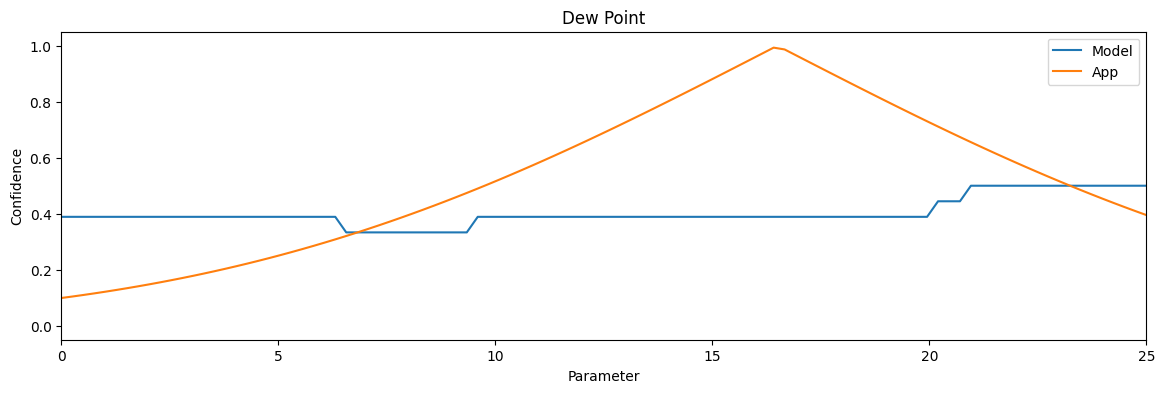

In [166]:
chart_parameter('Dew Point', 'dewPoint', true_dewPoint, 0, 25)

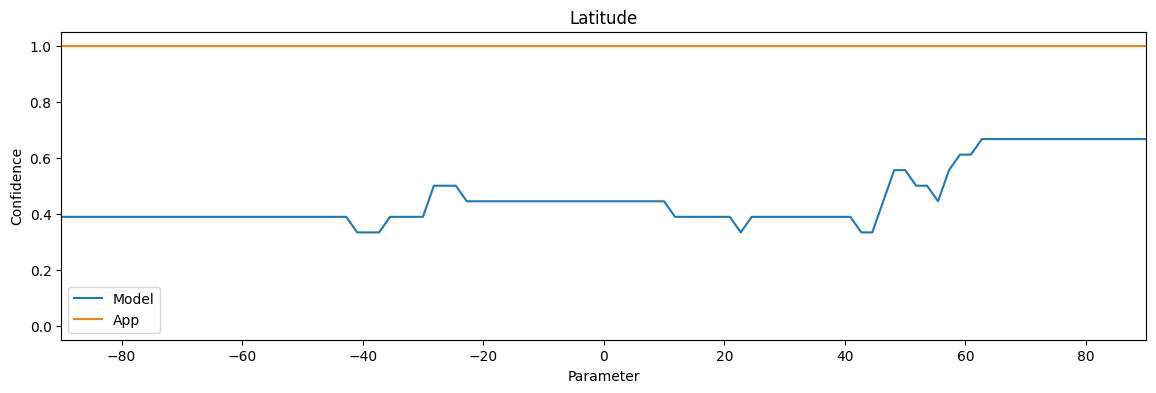

In [167]:
chart_parameter('Latitude', 'lat', true_funct, -90, 90)

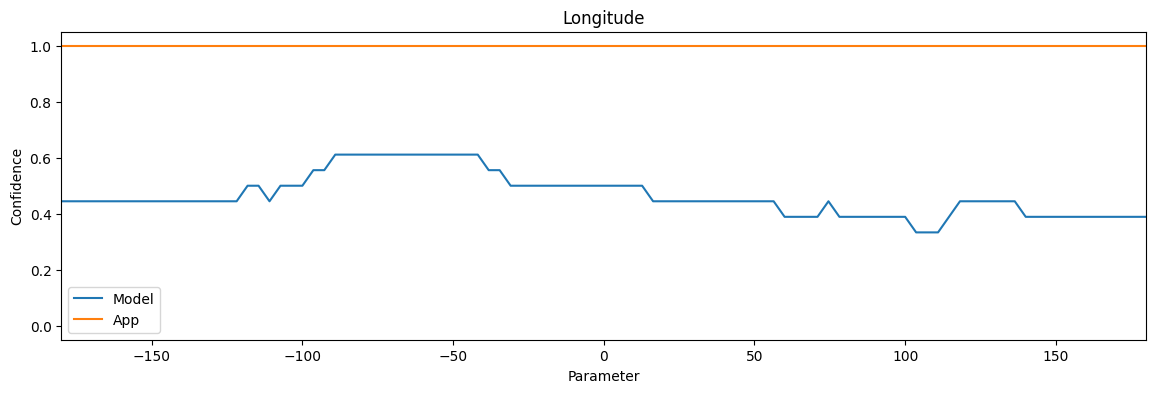

In [168]:
chart_parameter('Longitude', 'lon', true_funct, -180, 180)

In [169]:
from sklearn import linear_model, tree
import m2cgen as m2c
import pickle

code = m2c.export_to_dart(automl)

# save the model 
filename = 'hour_model_01.dart' 
text_file = open(filename, "w")
n = text_file.write(code)
text_file.close()
print(f"Random Forest size: {np.round(os.path.getsize(filename) / 1024 / 1024, 2) } MB")

Random Forest size: 5.6 MB
